In [147]:
#!nvidia-smi

In [148]:
# from google.colab import drive
# drive.mount('/content/drive')

# Loading Libraries

In [505]:
#data management tools
import pandas as pd
import numpy as np

from matplotlib import pyplot

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

import seaborn as sb
import datetime

# #Vectorization and Tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn import utils
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import mean_absolute_error


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

# #DNN Modules
# import torch
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras import losses
# from tensorflow.keras.regularizers import L2
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import TextVectorization

# #Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC  

# #Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

import multiprocessing
cores = multiprocessing.cpu_count()

# Dataloading and Preprocessing

In [150]:
#My MacBook
df1 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/logon.csv')
df2 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/device.csv')
df3 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/email.csv')
df4 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/file.csv')
df5 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/http.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
ldap = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/ldap/2009-12.csv')
df6 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/psychometric.csv')

#Google Drive - Colab
# df1 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/logon.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/device.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/http.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/email.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/file.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/psychometric.csv')

In [151]:
START = datetime.date(2010,7,1)
END = datetime.date(2010,10,31)

In [152]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])
df5['date'] = pd.to_datetime(df5['date'])

df1['day_date'] = pd.to_datetime(df1['date']).dt.date
df2['day_date'] = pd.to_datetime(df2['date']).dt.date
df3['day_date'] = pd.to_datetime(df3['date']).dt.date
df4['day_date'] = pd.to_datetime(df4['date']).dt.date
df5['day_date'] = pd.to_datetime(df5['date']).dt.date

In [153]:
df3['activity'] = "email"
df4['activity'] = "file"
df5['activity'] = "http"

In [154]:
df1_bs = df1[((df1['day_date'] >= START) & (df1['day_date'] <= END))]
df2_bs = df2[((df2['day_date'] >= START) & (df2['day_date'] <= END))]
df3_bs = df3[((df3['day_date'] >= START) & (df3['day_date'] <= END))]
df4_bs = df4[((df4['day_date'] >= START) & (df4['day_date'] <= END))]
df5_bs = df5[((df5['day_date'] >= START) & (df5['day_date'] <= END))]

# Stemming Lemmatizing Stopwords Lowercase and Tokenized

In [155]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    
    # #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    # #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    joined = ", ".join(lower_words)

    return(joined)

#ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [156]:
df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
df5_bs['df5tokenized'] = df5_bs['content'].apply(prepare_text)

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_10811/614576161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_10811/614576161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_10811/614576161.py:3: SettingWithCopyWarning: 
A value is trying to be se

# TFIDF

VARIABLE 1 - What Text Approach Word Word Well?

In [157]:
# nltk.download('stopwords')
# stops = set(stopwords.words('english'))
# tfidfvectorizer = TfidfVectorizer(stop_words='english', analyzer='word' )

In [158]:
# tfidf_df3 = tfidfvectorizer.fit_transform(df3_bs['df3tokenized'])
# df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()
# df3_bs['df3tfidf_max'] = tfidf_df3.max()

In [159]:
# tfidf_df4 = tfidfvectorizer.fit_transform(df4_bs['df4tokenized'])
# df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()
# df4_bs['df4tfidf_max'] = tfidf_df4.max()

In [160]:
# tfidf_df5 = tfidfvectorizer.fit_transform(df5_bs['df5tokenized'])
# df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
# #df5_bs['df5tfidf_max'] = tfidf_df5.max()

# Aggregate data

In [161]:
df_merged = pd.concat([df1_bs, df2_bs, df3_bs, df4_bs, df5_bs])

In [162]:
df_merged['label'] = 'normal'

In [163]:
df_merged.loc[df_merged['id'].isin(ans['id']),['label']] = 'bad'

In [164]:
dates = df_merged['day_date']
dates = dates.unique()

In [165]:
df_merged['df3tokenized'].fillna('', inplace=True)
df_merged['df4tokenized'].fillna('', inplace=True)
df_merged['df5tokenized'].fillna('', inplace=True)

VARIABLE 2 Can This Be Changed to Something Other Than Counts?

In [166]:
dfwow = []
for d in dates:
    dayevents = df_merged.loc[(df_merged['day_date'] == d)]
    users = dayevents['user']
    users = users.unique()
    email_text = " "
    file_text = " "
    http_text = " "
    for u in users:
        userd = dayevents[(dayevents['user'] == u)]
        date = d
        username = u
        login_count = userd[userd['activity'] == 'Logon'].shape[0]
        logout_count = userd[userd['activity'] == 'Logoff'].shape[0]
        email_count = userd[userd['activity'] == 'email'].shape[0]
        file_count = userd[userd['activity'] == 'file'].shape[0]
        http_count = userd[userd['activity'] == 'http'].shape[0]
        start_time = userd['date'].iloc[0]
        end_time = userd['date'].iloc[-1]
        # tfidf3_mean = userd['df3tfidf_mean'].mean()
        # tfidf4_mean = userd['df4tfidf_mean'].mean()
        # tfidf5_mean = userd['df5tfidf_mean'].mean()
        email_text_temp = userd['df3tokenized'].to_list()
        email_text = [i for s in email_text_temp for i in s]
        file_text_temp = userd['df4tokenized'].to_list()
        file_text = [i for s in file_text_temp for i in s]
        http_text_temp = userd['df5tokenized'].to_list()
        http_text = [i for s in http_text_temp for i in s]
        text = http_text 
        if (userd[(userd['label'] == 'bad')].shape[0] > 0): label = 'bad'
        else: label = 'normal'
        dfwow.append([date, username, login_count, logout_count, email_count, file_count, http_count, start_time, end_time, text, label])

In [167]:
final = pd.DataFrame(dfwow, columns=['date', 'username', 'login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_time', 'end_time', 'text', 'label'])

Can We Add More Time Components?

In [168]:
final['start_secs'] = final['start_time'].apply(lambda s: (s - s.replace(hour=0, minute=0, second=0, microsecond=0)).seconds)
final['end_secs'] = final['end_time'].apply(lambda s: (s - s.replace(hour=0, minute=0, second=0, microsecond=0)).seconds)

Try SkipGram and Other Parameters

In [169]:
tagged = final.apply(lambda r: TaggedDocument(words=r['text'], tags=r['username']), axis=1)
model_dbow = Doc2Vec(dm=0, vector_size=20, negative=10, hs=0, min_count=0, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(tagged.values)])
for epoch in range(5):
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
    model_dbow.train(utils.shuffle([x for x in tqdm(tagged.values)]), total_examples=len(tagged.values), epochs=5)

100%|██████████| 82290/82290 [00:00<00:00, 4226248.67it/s]


In [170]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags, model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [171]:
y, X = vec_for_learning(model_dbow, tagged)

How many vectors?

In [172]:
d2v_df = pd.DataFrame(X, columns=['dim1','dim2','dim3','dim4','dim5', 'dim6','dim7','dim8','dim9','dim10', 'dim11','dim12','dim13','dim14','dim15', 'dim16','dim17','dim18','dim19','dim20'])

In [173]:
joined1_df = final.join(d2v_df)

In [174]:
users = joined1_df['username']
users = users.unique()

In [175]:
def Euclidean_Dist_Text(df1, df2, cols=['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10','dim11','dim12','dim13','dim14','dim15','dim16','dim17','dim18','dim19','dim20']):
    return np.linalg.norm(df1[cols].values - df2[cols].values, axis=1)

In [176]:
def Euclidean_Dist_Activity(df1, df2, cols=['login_count','logout_count','email_count','file_count','http_count','start_secs','end_secs']):
    return np.linalg.norm(df1[cols].values - df2[cols].values, axis=1)

check indexes - maybe reset

In [177]:
something = pd.DataFrame()
for u in users:
    userevents = joined1_df.loc[(joined1_df['username'] == u)]
    vector_activity = userevents.loc[:, ['login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_secs', 'end_secs']]
    vector_1d_activity = vector_activity.shift()
    vector_1d_activity = vector_1d_activity.rename(columns={'login_count':'login_count_1d', 'logout_count':'logout_count_1d', 'email_count':'email_count_1d', 'file_count':'file_count_1d', 'http_count':'http_count_1d', 'start_secs':'start_secs_1d', 'end_secs':'end_secs_1d'})
    vector_7d_activity = vector_activity.shift(7)
    vector_7d_activity = vector_7d_activity.rename(columns={'login_count':'login_count_7d', 'logout_count':'logout_count_7d', 'email_count':'email_count_7d', 'file_count':'file_count_7d', 'http_count':'http_count_7d', 'start_secs':'start_secs_7d', 'end_secs':'end_secs_7d'})
    vector_text = userevents.loc[:, ['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10','dim11','dim12','dim13','dim14', 'dim15', 'dim16','dim17','dim18','dim19','dim20']]
    vector_1d_text = vector_text.shift()
    vector_7d_text = vector_text.shift(7)
    #activity_dist = Euclidean_Dist_Activity(vector_activity, vector_1d_activity)
    #activity_dist_7d = Euclidean_Dist_Activity(vector_activity, vector_7d_activity)
    #userevents['activity_distance'] = activity_dist.tolist()
    #userevents['activity_distance_7d'] = activity_dist_7d.tolist()
    text_dist = Euclidean_Dist_Text(vector_text, vector_1d_text)
    text_dist_7d = Euclidean_Dist_Text(vector_text, vector_7d_text)
    userevents['text_distance'] = text_dist.tolist()
    userevents['text_distance_7d'] = text_dist_7d.tolist()
    newuserevents = userevents.filter(['username', 'date', 'text_distance', 'text_distance_7d'])
    newuserevents = newuserevents.join(vector_1d_activity)
    newuserevents = newuserevents.join(vector_7d_activity)
    something = pd.concat([something, newuserevents])

    

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_10811/2017195961.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userevents['text_distance'] = text_dist.tolist()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_10811/2017195961.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userevents['text_distance_7d'] = text_dist_7d.tolist()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_10811/2017195961.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [178]:
final_individual_deltas_join_df = pd.merge(joined1_df, something, on=['username', 'date'], how='left')

In [179]:
final_individual_deltas_join_df['login_count_1d'] = (final_individual_deltas_join_df['login_count'] - final_individual_deltas_join_df['login_count_1d'])
final_individual_deltas_join_df['logout_count_1d'] = (final_individual_deltas_join_df['logout_count'] - final_individual_deltas_join_df['logout_count_1d'])
final_individual_deltas_join_df['email_count_1d'] = (final_individual_deltas_join_df['email_count'] - final_individual_deltas_join_df['email_count_1d'])
final_individual_deltas_join_df['file_count_1d'] = (final_individual_deltas_join_df['file_count'] - final_individual_deltas_join_df['file_count_1d'])
final_individual_deltas_join_df['http_count_1d'] = (final_individual_deltas_join_df['http_count'] - final_individual_deltas_join_df['http_count_1d'])
final_individual_deltas_join_df['start_secs_1d'] = (final_individual_deltas_join_df['start_secs'] - final_individual_deltas_join_df['start_secs_1d'])
final_individual_deltas_join_df['end_secs_1d'] = (final_individual_deltas_join_df['end_secs'] - final_individual_deltas_join_df['end_secs_1d'])

final_individual_deltas_join_df['login_count_7d'] = (final_individual_deltas_join_df['login_count'] - final_individual_deltas_join_df['login_count_7d'])
final_individual_deltas_join_df['logout_count_7d'] = (final_individual_deltas_join_df['logout_count'] - final_individual_deltas_join_df['logout_count_7d'])
final_individual_deltas_join_df['email_count_7d'] = (final_individual_deltas_join_df['email_count'] - final_individual_deltas_join_df['email_count_7d'])
final_individual_deltas_join_df['file_count_7d'] = (final_individual_deltas_join_df['file_count'] - final_individual_deltas_join_df['file_count_7d'])
final_individual_deltas_join_df['http_count_7d'] = (final_individual_deltas_join_df['http_count'] - final_individual_deltas_join_df['http_count_7d'])
final_individual_deltas_join_df['start_secs_7d'] = (final_individual_deltas_join_df['start_secs'] - final_individual_deltas_join_df['start_secs_7d'])
final_individual_deltas_join_df['end_secs_7d'] = (final_individual_deltas_join_df['end_secs'] - final_individual_deltas_join_df['end_secs_7d'])

In [180]:
#We drop the first 7 days of activity for the user so it does not skew the distance calculation.
users = final_individual_deltas_join_df['username']
users = users.unique()
for u in users:
    userIndex = final_individual_deltas_join_df[(final_individual_deltas_join_df['username'] == u)].index.values[:7]
    final_individual_deltas_join_df.drop(userIndex , inplace=True)

In [423]:
df6.rename(columns={'user_id': 'username'}, inplace=True)
final_individual_deltas_join_df = pd.merge(final_individual_deltas_join_df, df6, on='username', how='left')

Compute Department means for the previous 30 days

In [427]:
ldap = ldap.rename(columns={'user_id': 'username'})
joined_df = pd.merge(final_individual_deltas_join_df, ldap, on='username', how='left')
label_encoder = LabelEncoder()
joined_df['username'] = label_encoder.fit_transform(joined_df['username'])
joined_df['department'] = label_encoder.fit_transform(joined_df['department'])
depts = joined_df['department']
depts = depts.unique()

In [428]:
dept_means = []
for d in depts:
    dept_events = joined_df.loc[(joined_df['department'] == d)]
    department = d
    login_mean = dept_events['login_count'].mean()
    logout_mean = dept_events['logout_count'].mean()
    http_mean = dept_events['http_count'].mean()
    file_mean = dept_events['file_count'].mean()
    email_mean = dept_events['logout_count'].mean()
    start_mean = dept_events['start_secs'].mean()
    end_mean = dept_events['end_secs'].mean()
    dept_means.append([department, login_mean, logout_mean, email_mean, file_mean, http_mean, start_mean, end_mean])
dept_events_df = pd.DataFrame(dept_means, columns=['department', 'login_mean', 'logout_mean', 'email_mean', 'file_mean', 'http_mean', 'start_mean', 'end_mean'])
last_joined_df = pd.merge(joined_df, dept_events_df, on='department', how='left')

In [429]:
#use this if we are going to compare activity as a vector to the department's means
#last_joined_means_df = last_joined_df.loc[:, ['login_mean', 'logout_mean', 'email_mean', 'file_mean', 'http_mean', 'start_mean', 'end_mean']]
#last_joined_means_df = last_joined_means_df.rename(columns={'login_mean': 'login_count', 'logout_mean': 'logout_count', 'email_mean': 'email_count', 'file_mean': 'file_count', 'http_mean': 'http_count', 'start_mean': 'start_secs', 'end_mean': 'end_secs'})
# last_joined_inv_df = last_joined_df.loc[:, ['login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_secs', 'end_secs']]
# dept_activity_dist = Euclidean_Dist_Activity(last_joined_means_df, last_joined_inv_df)
# last_joined_df['dept_activity_distance'] = dept_activity_dist.tolist()



In [430]:
last_joined_df['login_diff_to_dept'] = (last_joined_df['login_count'] - last_joined_df['login_mean'])
last_joined_df['logout_diff_to_dept'] = (last_joined_df['logout_count'] - last_joined_df['logout_mean'])
last_joined_df['email_diff_to_dept'] = (last_joined_df['email_count'] - last_joined_df['email_mean'])
last_joined_df['file_diff_to_dept'] = (last_joined_df['file_count'] - last_joined_df['file_mean'])
last_joined_df['http_diff_to_dept'] = (last_joined_df['http_count'] - last_joined_df['http_mean'])
last_joined_df['start_diff_to_dept'] = (last_joined_df['start_secs'] - last_joined_df['start_mean'])
last_joined_df['end_diff_to_dept'] = (last_joined_df['end_secs'] - last_joined_df['end_mean'])

In [431]:
#setting up labels so they can be used with ML algorithms.
last_joined_df.loc[last_joined_df['label'] == 'normal', 'label'] = 0
last_joined_df.loc[last_joined_df['label'] == 'bad', 'label'] = 1
last_joined_df['label'] = last_joined_df['label'].astype('int64')

In [432]:
last_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75514 entries, 0 to 75513
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 75514 non-null  object        
 1   username             75514 non-null  int64         
 2   login_count          75514 non-null  int64         
 3   logout_count         75514 non-null  int64         
 4   email_count          75514 non-null  int64         
 5   file_count           75514 non-null  int64         
 6   http_count           75514 non-null  int64         
 7   start_time           75514 non-null  datetime64[ns]
 8   end_time             75514 non-null  datetime64[ns]
 9   text                 75514 non-null  object        
 10  label                75514 non-null  int64         
 11  start_secs           75514 non-null  int64         
 12  end_secs             75514 non-null  int64         
 13  dim1                 75514 non-

# Sampling Methods

<Axes: xlabel='label', ylabel='count'>

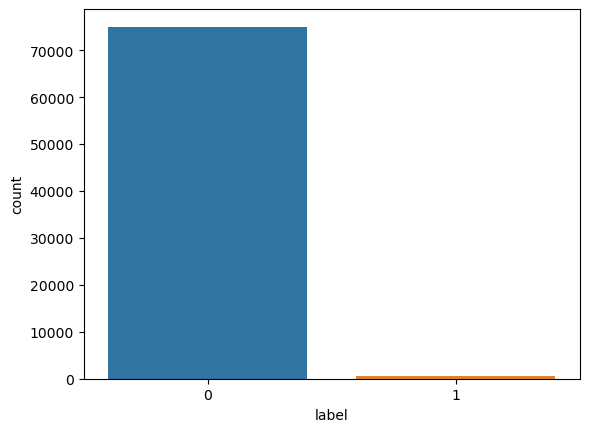

In [433]:
sb.countplot(data=last_joined_df, x='label')

In [434]:
print("Number of malicious records: ", last_joined_df['label'].value_counts()[1])
print("Number of normal records: ", last_joined_df['label'].value_counts()[0])

Number of malicious records:  496
Number of normal records:  75018


In [435]:
last_joined_df.dropna(inplace=True)

In [436]:
last_joined_df.columns

Index(['date', 'username', 'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count', 'start_time', 'end_time', 'text', 'label',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'employee_name_x', 'O', 'C', 'E', 'A', 'N',
       'employee_name_y', 'email', 'role', 'business_unit', 'functional_unit',
       'department', 'team', 'supervisor', 'login_mean', 'logout_mean',
       'email_mean', 'file_mean', 'http_mean', 'start_mean', 'end_mean',
       'login_diff_to_dept', 'logout_diff_to_dept

In [437]:
X = last_joined_df.loc[:, ['date', 'username', 'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count', 'start_time', 'end_time', 'text', 'label',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'employee_name_x', 'O', 'C', 'E', 'A', 'N',
       'employee_name_y', 'email', 'role', 'business_unit', 'functional_unit',
       'department', 'team', 'supervisor', 'login_mean', 'logout_mean',
       'email_mean', 'file_mean', 'http_mean', 'start_mean', 'end_mean',
       'login_diff_to_dept', 'logout_diff_to_dept', 'email_diff_to_dept',
       'file_diff_to_dept', 'http_diff_to_dept', 'start_diff_to_dept',
       'end_diff_to_dept']]

In [438]:
y = last_joined_df['label']

In [439]:
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [440]:
X_train = X_train1.loc[:, ['login_count', 'logout_count', 'email_count',
       'file_count', 'http_count',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'O', 'C', 'E', 'A', 'N', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
       'start_diff_to_dept', 'end_diff_to_dept']
       ]

In [442]:
X_test = X_test1.loc[:, ['login_count', 'logout_count', 'email_count',
       'file_count', 'http_count',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'O', 'C', 'E', 'A', 'N', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
       'start_diff_to_dept', 'end_diff_to_dept']
       ]

In [443]:
# X_train = X_train1.loc[:, ['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        'login_diff_to_dept', 'logout_diff_to_dept',
#        'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
#        'start_diff_to_dept', 'end_diff_to_dept']
#        ]

In [444]:
# X_test = X_test1.loc[:, ['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        'login_diff_to_dept', 'logout_diff_to_dept',
#        'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
#        'start_diff_to_dept', 'end_diff_to_dept'
#        ]]

In [445]:
# X_train = X_train1.loc[:, ['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',]
#        ]

In [446]:
# X_test = X_test1.loc[:, ['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
# ]]

In [447]:
sc = StandardScaler()

In [448]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()
y_test = y_test.reset_index()

In [449]:
X_train.drop(['index'], axis=1, inplace=True)
X_test.drop(['index'], axis=1, inplace=True)

y_train.drop(['index'], axis=1, inplace=True)
y_test.drop(['index'], axis=1, inplace=True)

In [450]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [451]:
X_train = pd.DataFrame(X_train, columns=[
       'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'O', 'C', 'E', 'A', 'N', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
       'start_diff_to_dept', 'end_diff_to_dept'])

X_test = pd.DataFrame(X_test, columns=['login_count', 'logout_count', 'email_count',
       'file_count', 'http_count',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'O', 'C', 'E', 'A', 'N', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
       'start_diff_to_dept', 'end_diff_to_dept'])


# X_train = pd.DataFrame(X_train, columns=[
#        'login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        'login_diff_to_dept', 'logout_diff_to_dept',
#        'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
#        'start_diff_to_dept', 'end_diff_to_dept'])

# X_test = pd.DataFrame(X_test, columns=['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        'login_diff_to_dept', 'logout_diff_to_dept',
#        'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
#        'start_diff_to_dept', 'end_diff_to_dept'])

# X_train = pd.DataFrame(X_train, columns=[
#        'login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        ])

# X_test = pd.DataFrame(X_test, columns=['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        ])


In [452]:
final_undersample = RandomUnderSampler(sampling_strategy='majority')
X_final_under, y_final_under = final_undersample.fit_resample(X_train, y_train)

In [453]:
final_oversample = RandomOverSampler(sampling_strategy='minority')
X_final_over, y_final_over = final_oversample.fit_resample(X_train, y_train)

In [454]:
final_smote = SMOTE(k_neighbors=10)
X_final_smote, y_final_smote = final_smote.fit_resample(X_train, y_train)

In [455]:
final_blsmote = BorderlineSMOTE(k_neighbors=10)
X_final_blsmote, y_final_blsmote = final_blsmote.fit_resample(X_train, y_train)

In [456]:
final_adasyn = ADASYN(n_neighbors=5)
X_final_adasyn, y_final_adasyn = final_adasyn.fit_resample(X_train, y_train)

In [457]:
final_under = X_final_under.copy()
final_over = X_final_over.copy()
final_smote = X_final_smote.copy()
final_blsmote = X_final_blsmote.copy()
final_adasyn = X_final_adasyn.copy()

In [458]:
final_under['label'] = y_final_under
final_over['label'] = y_final_over
final_smote['label'] = y_final_smote
final_blsmote['label'] = y_final_blsmote
final_adasyn['label'] = y_final_adasyn

In [459]:
# sb.displot(data=final_adasyn, x="start_delta", y='ind_start_secs_delta', hue="label", kind='kde')

In [460]:
# sb.pairplot(X)

In [461]:
#C is the most meaningful - penalty would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train,y_train.values.ravel())
# print("LR best estimater: ", grid.best_estimator_)
# print("LR Best parameters:", grid.best_params_)
# nosample_lr_best_est = grid.best_estimator_

In [462]:

#linear failed to converge
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train,y_train.values.ravel())
# print("SVM best estimater: ", grid.best_estimator_)
# print("SVM Best parameters:", grid.best_params_)
# nosample_svm_best_est = grid.best_estimator_


In [463]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train,y_train.values.ravel())
# print("KNN best estimater: ", grid.best_estimator_)
# print("KNN Best parameters:", grid.best_params_)
# nosample_knn_best_est = grid.best_estimator_


In [464]:

# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train, y_train.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# nosample_rf_best_est = grid.best_estimator_


In [465]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train, y_train.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# nosample_ada_best_est = grid.best_estimator_


In [466]:
lr = LogisticRegression(max_iter=1000)
svm = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [467]:
results_no_sample = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train, y_train.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    prec = metrics.precision_score(y_test, predicted)
    f1 = metrics.f1_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted)
    results_no_sample.append([acc, rec, prec, f1, auc])


/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [371]:
# X_numpy_nosample = np.expand_dims(X_train.values[:,:],axis = 2)
# y_numpy_nosample = y_train.values[:]
# X_numpy_nosample_test = np.expand_dims(X_test.values[:,:],axis = 2)
# y_numpy_nosample_test = y_test.values[:]
# model = Sequential()
# model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(LSTM(units=256, return_sequences=False))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
# model.fit(X_numpy_nosample, y_numpy_nosample, epochs=6, batch_size=128, validation_data=(X_numpy_nosample_test, y_numpy_nosample_test))


In [468]:

# X_numpy = np.expand_dims(X_test.values[:],axis = 2)
# y_numpy = y_test.values[:]
# ypred = model.predict(X_numpy)
# predlabels = [int(p>=0.5) for p in ypred]
# acc = metrics.accuracy_score(y_test, predlabels)
# rec = metrics.recall_score(y_test, predlabels)
# cf_matrix = metrics.confusion_matrix(y_test,predlabels)
# print(cf_matrix)
# print("LSTM Accuracy:", acc)
# print("LSTM Recall:", rec)
# results_no_sample.append([acc, rec])
# cf_matrix = metrics.confusion_matrix(y_test,predlabels)
print(results_no_sample)

[[0.9940512507626602, 0.0, 0.0, 0.0, 0.5], [0.9945088468578401, 0.07692307692307693, 1.0, 0.14285714285714288, 0.5384615384615384], [0.9943563148261135, 0.06837606837606838, 0.8, 0.12598425196850396, 0.5341368859091737], [0.9975594874923734, 0.6239316239316239, 0.948051948051948, 0.7525773195876289, 0.8118635154080912], [0.9964409192597112, 0.6153846153846154, 0.7422680412371134, 0.6728971962616823, 0.8070529542065524]]


# Undersampling

In [469]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_final_under, y_final_under, test_size=0.3)

In [470]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_under,y_train_under.values.ravel())
# print("LR best estimater: ", grid.best_estimator_)
# print("LR Best parameters:", grid.best_params_)
# under_lr_best_est = grid.best_estimator_


In [471]:

# #linear failed to converge 
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_under,y_train_under.values.ravel())
# print("SVM best estimater: ", grid.best_estimator_)
# print("SVM Best parameters:", grid.best_params_)
# under_svm_best_est = grid.best_estimator_



In [472]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_under,y_train_under.values.ravel())
# print("KNN best estimater: ", grid.best_estimator_)
# print("KNN Best parameters:", grid.best_params_)
# under_knn_best_est = grid.best_estimator_


In [473]:

# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_under, y_train_under.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# under_rf_best_est = grid.best_estimator_



In [474]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_under, y_train_under.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# under_ada_best_est = grid.best_estimator_


In [475]:
# #Adapt from above
# lr = LogisticRegression(max_iter=1000)
# svm = SVC(probability=True)
# knn = bls_knn_best_est
# rf = bls_rf_best_est
# ada = bls_ada_best_est


Epoch 1/15
998/998 [==============================] - 56s 53ms/step - loss: 0.4682 - accuracy: 0.7643 - val_loss: 0.3733 - val_accuracy: 0.8300
Epoch 2/15
998/998 [==============================] - 53s 54ms/step - loss: 0.1707 - accuracy: 0.9354 - val_loss: 0.1147 - val_accuracy: 0.9596
Epoch 3/15
998/998 [==============================] - 50s 51ms/step - loss: 0.0873 - accuracy: 0.9708 - val_loss: 0.0691 - val_accuracy: 0.9772
Epoch 4/15
998/998 [==============================] - 52s 52ms/step - loss: 0.0598 - accuracy: 0.9809 - val_loss: 0.0622 - val_accuracy: 0.9782
Epoch 5/15
998/998 [==============================] - 53s 53ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0332 - val_accuracy: 0.9895
Epoch 6/15
998/998 [==============================] - 52s 52ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.0384 - val_accuracy: 0.9884
Epoch 7/15
998/998 [==============================] - 52s 52ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0308 - val_accuracy:

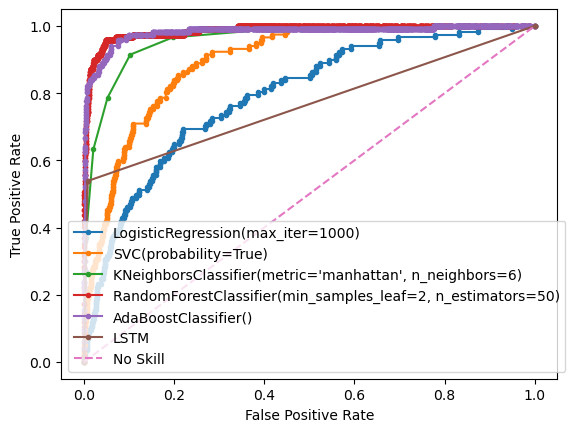

[[0.7197986577181208, 0.717948717948718, 0.015102481121898598, 0.029582673005810883, 0.7188792231756786], [0.7790319300386415, 0.8632478632478633, 0.02279395170390431, 0.044415127528583995, 0.8208879078911302], [0.9467154769168192, 0.7863247863247863, 0.08251121076233184, 0.14935064935064934, 0.8670000485252901], [0.9123449257677445, 0.9658119658119658, 0.06164757228587016, 0.1158974358974359, 0.9389184630860249], [0.9540878584502746, 0.8974358974358975, 0.10542168674698796, 0.18867924528301885, 0.9259313904856332], [0.98917025, 0.53846157, 0.2837838, 0.91387236]]


In [530]:
results_under = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_under, y_train_under.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    prec = metrics.precision_score(y_test, predicted)
    f1 = metrics.f1_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted)
    results_under.append([acc, rec, prec, f1, auc])
    m_probs = m.predict_proba(X_test)
    m_probs = m_probs[:, 1]
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    pyplot.plot(m_fpr, m_tpr, marker='.', label=(m))

X_numpy_under = np.expand_dims(X_train_under.values[:,:],axis = 2)
y_numpy_under = y_train_under.values[:]
X_numpy_under_test = np.expand_dims(X_test_under.values[:,:],axis = 2)
y_numpy_under_test = y_test_under.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X_numpy_smote, y_numpy_smote, epochs=15, batch_size=64, validation_data=(X_numpy_smote_test, y_numpy_smote_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()

ba = tf.keras.metrics.BinaryAccuracy()
ba.update_state(y_numpy, ypred)
acc = ba.result().numpy()

br = tf.keras.metrics.Recall()
br.update_state(y_numpy, ypred)
rec = br.result().numpy()

bp = tf.keras.metrics.Precision()
bp.update_state(y_numpy, ypred)
prec = bp.result().numpy()

# bf1 = tf.keras.metrics.F1Score()
# bf1.update_state(y_numpy, ypred)
# f1 = bf1.result().numpy()

bauc = tf.keras.metrics.AUC()
bauc.update_state(y_numpy, ypred)
auc = bauc.result().numpy()

results_under.append([acc, rec, prec, auc])

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()
predlabels = [int(p>=0.5) for p in ypred]
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predlabels)

pyplot.plot(fpr_keras, tpr_keras, marker='.', label=("LSTM"))

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(results_under)



# Oversampling

In [477]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_final_over, y_final_over, test_size=0.3)


In [478]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_over,y_train_over.values.ravel())
# print("LR best estimater: ", grid.best_estimator_)
# print("LR Best parameters:", grid.best_params_)
# over_lr_best_est = grid.best_estimator_



In [479]:
# #linear failed to converge 
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_over,y_train_over.values.ravel())
# print("SVM best estimater: ", grid.best_estimator_)
# print("SVM Best parameters:", grid.best_params_)
# over_svm_best_est = grid.best_estimator_

In [480]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_over,y_train_over.values.ravel())
# print("KNN best estimater: ", grid.best_estimator_)
# print("KNN Best parameters:", grid.best_params_)
# over_knn_best_est = grid.best_estimator_


In [481]:
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_over, y_train_over.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# over_rf_best_est = grid.best_estimator_


In [482]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_over, y_train_over.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# over_ada_best_est = grid.best_estimator_


In [483]:
# #Adapt from above
lr = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)
# knn = bls_knn_best_est
# rf = bls_rf_best_est
# ada = bls_ada_best_est

Epoch 1/10
499/499 [==============================] - 87s 171ms/step - loss: 0.4618 - accuracy: 0.7686 - val_loss: 0.2185 - val_accuracy: 0.9108
Epoch 2/10
499/499 [==============================] - 82s 164ms/step - loss: 0.1061 - accuracy: 0.9638 - val_loss: 0.0620 - val_accuracy: 0.9798
Epoch 3/10
499/499 [==============================] - 80s 161ms/step - loss: 0.0403 - accuracy: 0.9886 - val_loss: 0.0291 - val_accuracy: 0.9919
Epoch 4/10
499/499 [==============================] - 80s 161ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0167 - val_accuracy: 0.9953
Epoch 5/10
499/499 [==============================] - 80s 161ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.0276 - val_accuracy: 0.9921
Epoch 6/10
499/499 [==============================] - 586s 1s/step - loss: 0.0119 - accuracy: 0.9968 - val_loss: 0.0209 - val_accuracy: 0.9948
Epoch 7/10
499/499 [==============================] - 86s 173ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0167 - val_accu

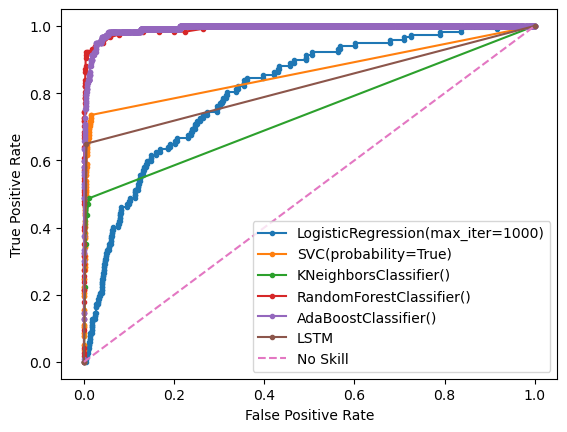

[[0.7900142363229612, 0.6666666666666666, 0.01870952266730631, 0.7287095289243516, 0.03639757349510033], [0.9921700223713646, 0.5811965811965812, 0.3930635838150289, 0.7879130059581188, 0.4689655172413793], [0.9900345739271914, 0.4358974358974359, 0.281767955801105, 0.7146240798227909, 0.3422818791946308], [0.9970510473866179, 0.5982905982905983, 0.8641975308641975, 0.7988639836115669, 0.7070707070707071], [0.9850010168802115, 0.8803418803418803, 0.2682291666666667, 0.9329846069910517, 0.4111776447105788], [0.63407564, 0.6752137, 0.010914617, 0.69486904]]


In [484]:
results_over = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_over, y_train_over.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    prec = metrics.precision_score(y_test, predicted)
    f1 = metrics.f1_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted)
    results_over.append([acc, rec, prec, auc, f1])
    m_probs = m.predict_proba(X_test)
    m_probs = m_probs[:, 1]
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    pyplot.plot(m_fpr, m_tpr, marker='.', label=(m))

X_numpy_over = np.expand_dims(X_train_over.values[:,:],axis = 2)
y_numpy_over = y_train_over.values[:]
X_numpy_over_test = np.expand_dims(X_test_over.values[:,:],axis = 2)
y_numpy_over_test = y_test_over.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X_numpy_smote, y_numpy_smote, epochs=15, batch_size=64, validation_data=(X_numpy_smote_test, y_numpy_smote_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()

ba = tf.keras.metrics.BinaryAccuracy()
ba.update_state(y_numpy, ypred)
acc = ba.result().numpy()

br = tf.keras.metrics.Recall()
br.update_state(y_numpy, ypred)
rec = br.result().numpy()

bp = tf.keras.metrics.Precision()
bp.update_state(y_numpy, ypred)
prec = bp.result().numpy()

# bf1 = tf.keras.metrics.F1Score()
# bf1.update_state(y_numpy, ypred)
# f1 = bf1.result().numpy()

bauc = tf.keras.metrics.AUC()
bauc.update_state(y_numpy, ypred)
auc = bauc.result().numpy()
results_over.append([acc, rec,])

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()
predlabels = [int(p>=0.5) for p in ypred]
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predlabels)

pyplot.plot(fpr_keras, tpr_keras, marker='.', label=("LSTM"))

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(results_over)



In [547]:
# #Adapt from above
lr = LogisticRegression(max_iter=1000)
svm = SVC(probability=True, kernel='rbf', C=1, gamma='auto')
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='manhattan')
# rf = bls_rf_best_est
# ada = bls_ada_best_est

/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Epoch 1/15
428/428 [==============================] - 69s 61ms/step - loss: 0.5207 - accuracy: 0.7464 - val_loss: 0.3742 - val_accuracy: 0.8516
Epoch 2/15
428/428 [==============================] - 25s 57ms/step - loss: 0.3856 - accuracy: 0.8140 - val_loss: 0.3201 - val_accuracy: 0.8609
Epoch 3/15
428/428 [==============================] - 24s 56ms/step - loss: 0.2908 - accuracy: 0.8637 - val_loss: 0.1422 - val_accuracy: 0.9340
Epoch 4/15
428/428 [==============================] - 24s 55ms/step - loss: 0.2070 - accuracy: 0.9118 - val_loss: 0.1692 - val_accuracy: 0.9241
Epoch 5/15
428/428 [==============================] - 24s 56ms/step - loss: 0.1445 - accuracy: 0.9458 - val_loss: 0.1078 - val_accuracy: 0.9562
Epoch 6/15
428/428 [==============================] - 24s 56ms/step - loss: 0.1052 - accuracy: 0.9638 - val_loss: 0.1064 - val_accuracy: 0.9567
Epoch 7/15
428/428 [==============================] - 24s 57ms/step - loss: 0.0854 - accuracy: 0.9714 - val_loss: 0.0873 - val_accuracy:

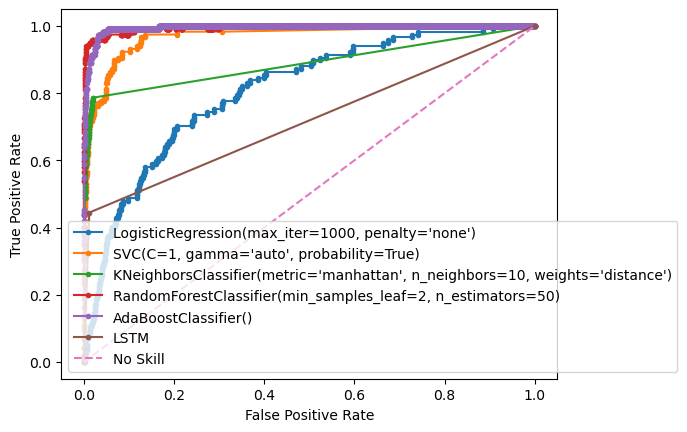

[[0.7900142363229612, 0.6666666666666666, 0.01870952266730631, 0.7287095289243516, 0.03639757349510033], [0.9921700223713646, 0.5811965811965812, 0.3930635838150289, 0.7879130059581188, 0.4689655172413793], [0.9900345739271914, 0.4358974358974359, 0.281767955801105, 0.7146240798227909, 0.3422818791946308], [0.9970510473866179, 0.5982905982905983, 0.8641975308641975, 0.7988639836115669, 0.7070707070707071], [0.9850010168802115, 0.8803418803418803, 0.2682291666666667, 0.9329846069910517, 0.4111776447105788], [0.63407564, 0.6752137, 0.010914617, 0.69486904], [0.7881330079316656, 0.6495726495726496, 0.018086625416468348, 0.7192674254972858, 0.03519333178976615], [0.9853060809436648, 0.6410256410256411, 0.2329192546583851, 0.8141960080735591, 0.34168564920273353], [0.9876449054301403, 0.6923076923076923, 0.28125, 0.840859999291793, 0.4], [0.9971527354077689, 0.7094017094017094, 0.7904761904761904, 0.8541382236333902, 0.7477477477477478], [0.9843400447427293, 0.8803418803418803, 0.2594458438

In [557]:
final_oversample_1 = RandomOverSampler(sampling_strategy=0.2)
X_final_over_1, y_final_over_1 = final_oversample_1.fit_resample(X_train, y_train)
final_undersample1 = RandomUnderSampler(sampling_strategy=.5)
X_final_over_under, y_final_over_under = final_undersample1.fit_resample(X_final_over_1, y_final_over_1)

results_over_under = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_final_over_under, y_final_over_under.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    prec = metrics.precision_score(y_test, predicted)
    f1 = metrics.f1_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted)
    results_over_under.append([acc, rec, prec, auc, f1])
    m_probs = m.predict_proba(X_test)
    m_probs = m_probs[:, 1]
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    pyplot.plot(m_fpr, m_tpr, marker='.', label=(m))

X_numpy_over_under = np.expand_dims(X_final_over_under.values[:,:],axis = 2)
y_numpy_over_under = y_final_over_under.values[:]
X_numpy_over_under_test = np.expand_dims(X_test.values[:,:],axis = 2)
y_numpy_over_under_test = y_test.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X_numpy_over_under, y_numpy_over_under, epochs=15, batch_size=64, validation_data=(X_numpy_over_under_test, y_numpy_over_under_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()

ba = tf.keras.metrics.BinaryAccuracy()
ba.update_state(y_numpy, ypred)
acc = ba.result().numpy()

br = tf.keras.metrics.Recall()
br.update_state(y_numpy, ypred)
rec = br.result().numpy()

bp = tf.keras.metrics.Precision()
bp.update_state(y_numpy, ypred)
prec = bp.result().numpy()

# bf1 = tf.keras.metrics.F1Score()
# bf1.update_state(y_numpy, ypred)
# f1 = bf1.result().numpy()

bauc = tf.keras.metrics.AUC()
bauc.update_state(y_numpy, ypred)
auc = bauc.result().numpy()
results_over.append([acc, rec, prec, auc])

predlabels = [int(p>=0.5) for p in ypred]
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predlabels)

pyplot.plot(fpr_keras, tpr_keras, marker='.', label=("LSTM"))

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(results_over)

# SMOTE

In [485]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_final_smote, y_final_smote, test_size=0.3)

In [486]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_smote,y_train_smote.values.ravel())
# print("logistic regression best: ", grid.best_estimator_)
# smote_lr_best_est = grid.best_estimator_



In [487]:
# #linear failed to converge
# param_grid = {'C': [1], 'gamma': ['auto'],'kernel': ['rbf']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_smote,y_train_smote.values.ravel())
# print("SVM best: ", grid.best_estimator_)
# smote_svm_best_est = grid.best_estimator_

In [498]:

param_grid = {'n_neighbors': list(range(5,6)), 'metric': ['manhattan'], 'weights': ['uniform'] }
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=2,cv=1, scoring='accuracy', return_train_score=False)
grid.fit(X_train_smote,y_train_smote.values.ravel())
print("KNN best: ", grid.best_estimator_)
smote_knn_best_est = grid.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   1.1s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   1.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.9s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.9s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.9s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.7s
[CV] END ...metric=euclidean, n_neighbors=6, weights=uniform; total time=   1.0s
[CV] END ...metric=euclidean, n_neighbors=6, we

In [501]:

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=2,cv=5, scoring='recall', return_train_score=False)
grid.fit(X_train_smote, y_train_smote.values.ravel())
print("RF Best estimater:", grid.best_estimator_)
print("RF Best parameters:", grid.best_params_)
print("RF Best score:", grid.best_score_)
smote_rf_best_est = grid.best_estimator_


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 

In [490]:
# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_smote, y_train_smote.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# print("ADA Best score:", grid.best_score_)
# smote_ada_best_est = grid.best_estimator_

In [521]:
print(smote_rf_best_est)
print(smote_knn_best_est)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50)
KNeighborsClassifier(metric='manhattan', n_neighbors=6)


In [517]:
# #Adapt from above
# lr = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)
knn = smote_knn_best_est
rf = smote_rf_best_est
# ada = bls_ada_best_est

Epoch 1/15
998/998 [==============================] - 56s 53ms/step - loss: 0.4747 - accuracy: 0.7640 - val_loss: 0.3887 - val_accuracy: 0.8356
Epoch 2/15
998/998 [==============================] - 51s 51ms/step - loss: 0.2263 - accuracy: 0.9096 - val_loss: 0.1795 - val_accuracy: 0.9315
Epoch 3/15
998/998 [==============================] - 52s 52ms/step - loss: 0.1245 - accuracy: 0.9567 - val_loss: 0.0963 - val_accuracy: 0.9672
Epoch 4/15
998/998 [==============================] - 51s 51ms/step - loss: 0.0836 - accuracy: 0.9722 - val_loss: 0.0736 - val_accuracy: 0.9747
Epoch 5/15
998/998 [==============================] - 51s 51ms/step - loss: 0.0645 - accuracy: 0.9786 - val_loss: 0.0684 - val_accuracy: 0.9779
Epoch 6/15
998/998 [==============================] - 52s 52ms/step - loss: 0.0543 - accuracy: 0.9828 - val_loss: 0.0425 - val_accuracy: 0.9859
Epoch 7/15
998/998 [==============================] - 54s 54ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0353 - val_accuracy:

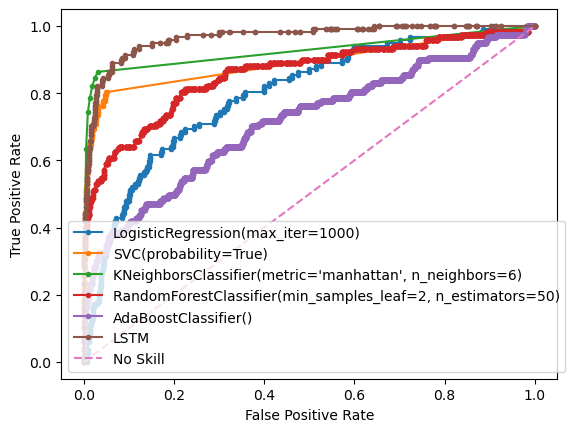

[[0.7961155175920277, 0.6666666666666666, 0.019264015806371944, 0.7317784256559766, 0.037445991358617384], [0.9915090502338825, 0.5213675213675214, 0.3546511627906977, 0.7578450312070075, 0.4221453287197232], [0.9854586129753915, 0.7863247863247863, 0.26062322946175637, 0.8864875427711087, 0.3914893617021276], [0.13763473662802522, 0.9743589743589743, 0.006677600749765698, 0.553493230722017, 0.013264296934085752], [0.00991458206223307, 1.0, 0.005972434915773353, 0.5019947828755562, 0.011873953417567362], [0.98733985, 0.5897436, 0.25555557, 0.9122926]]


In [522]:
results_smote = []
models = [lr, svm, knn, rf, ada]

for m in models:
    m.fit(X_train_smote, y_train_smote.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    prec = metrics.precision_score(y_test, predicted)
    f1 = metrics.f1_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted)
    results_smote.append([acc, rec, prec, auc, f1])
    m_probs = m.predict_proba(X_test)
    m_probs = m_probs[:, 1]
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    pyplot.plot(m_fpr, m_tpr, marker='.', label=(m))



X_numpy_smote = np.expand_dims(X_train_smote.values[:,:],axis = 2)
y_numpy_smote = y_train_smote.values[:]
X_numpy_smote_test = np.expand_dims(X_test_smote.values[:,:],axis = 2)
y_numpy_smote_test = y_test_smote.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X_numpy_smote, y_numpy_smote, epochs=15, batch_size=64, validation_data=(X_numpy_smote_test, y_numpy_smote_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()

ba = tf.keras.metrics.BinaryAccuracy()
ba.update_state(y_numpy, ypred)
acc = ba.result().numpy()

br = tf.keras.metrics.Recall()
br.update_state(y_numpy, ypred)
rec = br.result().numpy()

bp = tf.keras.metrics.Precision()
bp.update_state(y_numpy, ypred)
prec = bp.result().numpy()

# bf1 = tf.keras.metrics.F1Score()
# bf1.update_state(y_numpy, ypred)
# f1 = bf1.result().numpy()

bauc = tf.keras.metrics.AUC()
bauc.update_state(y_numpy, ypred)
auc = bauc.result().numpy()

results_smote.append([acc, rec, prec, auc])

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_numpy, ypred)
pyplot.plot(fpr_keras, tpr_keras, marker='.', label=("LSTM"))
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(results_smote)

# ADASYN

In [525]:
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_final_adasyn, y_final_adasyn, test_size=0.3)

In [399]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn,y_train_adasyn.values.ravel())
# print("logistic regression best: ", grid.best_estimator_)
# ada_lr_best_est = grid.best_estimator_



In [400]:

# #linear failed to converge
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn,y_train_adasyn.values.ravel())
# print("SVM best: ", grid.best_estimator_)
# ada_svm_best_est = grid.best_estimator_



In [401]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn,y_train_adasyn.values.ravel())
# print("KNN best: ", grid.best_estimator_)
# ada_knn_best_est = grid.best_estimator_



In [402]:

# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn, y_train_adasyn.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# print("RF Best score:", grid.best_score_)
# ada_rf_best_est = grid.best_estimator_


In [403]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn, y_train_adasyn.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# print("ADA Best score:", grid.best_score_)
# ada_ada_best_est = grid.best_estimator_

In [523]:
# #Adapt from above
# lr = ada_lr_best_est
# svm = ada_svm_best_est
# knn = ada_knn_best_est
# rf = ada_rf_best_est
# ada = ada_ada_best_est


Epoch 1/15
998/998 [==============================] - 55s 53ms/step - loss: 0.4578 - accuracy: 0.7747 - val_loss: 0.3292 - val_accuracy: 0.8562
Epoch 2/15
998/998 [==============================] - 52s 52ms/step - loss: 0.2136 - accuracy: 0.9148 - val_loss: 0.1663 - val_accuracy: 0.9345
Epoch 3/15
998/998 [==============================] - 53s 53ms/step - loss: 0.1385 - accuracy: 0.9493 - val_loss: 0.0981 - val_accuracy: 0.9655
Epoch 4/15
998/998 [==============================] - 51s 51ms/step - loss: 0.0867 - accuracy: 0.9700 - val_loss: 0.0645 - val_accuracy: 0.9801
Epoch 5/15
998/998 [==============================] - 50s 50ms/step - loss: 0.0736 - accuracy: 0.9752 - val_loss: 0.0483 - val_accuracy: 0.9844
Epoch 6/15
998/998 [==============================] - 51s 51ms/step - loss: 0.0735 - accuracy: 0.9749 - val_loss: 0.0526 - val_accuracy: 0.9833
Epoch 7/15
998/998 [==============================] - 52s 52ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0451 - val_accuracy:

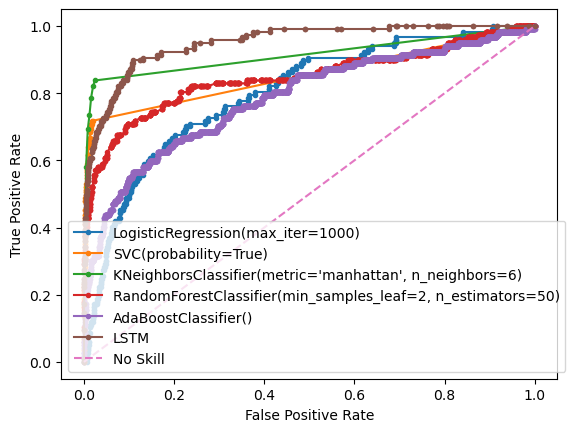

[[0.7852857433394346, 0.6752136752136753, 0.018527204502814257, 0.03606482538233279, 0.7305790640914165], [0.9919666463290624, 0.5213675213675214, 0.37423312883435583, 0.4357142857142857, 0.7580751984618794], [0.9862212731340249, 0.7350427350427351, 0.26380368098159507, 0.3882618510158013, 0.8613835740581176], [0.1375330486068741, 0.9658119658119658, 0.006619025304592315, 0.013147943452207806, 0.5491941523090824], [0.010982306284319707, 0.9914529914529915, 0.005928348750447182, 0.011786222312538102, 0.4982839096695166], [0.9871873, 0.5897436, 0.25274727, 0.86266667]]


In [526]:
results_adasyn = []
models = [lr, svm, knn, rf, ada]

for m in models:
    m.fit(X_train_adasyn, y_train_adasyn.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    prec = metrics.precision_score(y_test, predicted)
    f1 = metrics.f1_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted)
    results_adasyn.append([acc, rec, prec, f1, auc])
    m_probs = m.predict_proba(X_test)
    m_probs = m_probs[:, 1]
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    pyplot.plot(m_fpr, m_tpr, marker='.', label=(m))

X_numpy_adasyn = np.expand_dims(X_train_adasyn.values[:,:],axis = 2)
y_numpy_adasyn = y_train_adasyn.values[:]
X_numpy_adasyn_test = np.expand_dims(X_test_adasyn.values[:,:],axis = 2)
y_numpy_adasyn_test = y_test_adasyn.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X_numpy_smote, y_numpy_smote, epochs=15, batch_size=64, validation_data=(X_numpy_smote_test, y_numpy_smote_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()

ba = tf.keras.metrics.BinaryAccuracy()
ba.update_state(y_numpy, ypred)
acc = ba.result().numpy()

br = tf.keras.metrics.Recall()
br.update_state(y_numpy, ypred)
rec = br.result().numpy()

bp = tf.keras.metrics.Precision()
bp.update_state(y_numpy, ypred)
prec = bp.result().numpy()

# bf1 = tf.keras.metrics.F1Score()
# bf1.update_state(y_numpy, ypred)
# f1 = bf1.result().numpy()

bauc = tf.keras.metrics.AUC()
bauc.update_state(y_numpy, ypred)
auc = bauc.result().numpy()

results_adasyn.append([acc, rec, prec, auc])

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_numpy, ypred)
pyplot.plot(fpr_keras, tpr_keras, marker='.', label=("LSTM"))
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(results_adasyn)

# Borderline SMOTE

In [527]:
X_train_blsmote, X_test_blsmote, y_train_blsmote, y_test_blsmote = train_test_split(X_final_blsmote, y_final_blsmote, test_size=0.3)

In [528]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote,y_train_blsmote.values.ravel())
# print("logistic regression best: ", grid.best_estimator_)
# bls_lr_best_est = grid.best_estimator_



In [408]:

# #linear failed to converge
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote,y_train_blsmote.values.ravel())
# print("SVM best: ", grid.best_estimator_)
# bls_svm_best_est = grid.best_estimator_

In [409]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote,y_train_blsmote.values.ravel())
# print("KNN best: ", grid.best_estimator_)
# bls_knn_best_est = grid.best_estimator_



In [410]:

# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote, y_train_blsmote.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# print("RF Best score:", grid.best_score_)
# bls_rf_best_est = grid.best_estimator_



In [411]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote, y_train_blsmote)
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# print("ADA Best score:", grid.best_score_)
# bls_ada_best_est = grid.best_estimator_

In [412]:
# #Adapt from above
# lr = LogisticRegression(max_iter=1000)
# svm = SVC(probability=True)
# knn = bls_knn_best_est
# rf = bls_rf_best_est
# ada = bls_ada_best_est

Epoch 1/15
998/998 [==============================] - 96s 52ms/step - loss: 0.4650 - accuracy: 0.7693 - val_loss: 0.3132 - val_accuracy: 0.8604
Epoch 2/15
998/998 [==============================] - 51s 51ms/step - loss: 0.2193 - accuracy: 0.9123 - val_loss: 0.1497 - val_accuracy: 0.9426
Epoch 3/15
998/998 [==============================] - 51s 51ms/step - loss: 0.1284 - accuracy: 0.9544 - val_loss: 0.0976 - val_accuracy: 0.9671
Epoch 4/15
998/998 [==============================] - 51s 51ms/step - loss: 0.0874 - accuracy: 0.9707 - val_loss: 0.0660 - val_accuracy: 0.9776
Epoch 5/15
998/998 [==============================] - 52s 52ms/step - loss: 0.0656 - accuracy: 0.9785 - val_loss: 0.0627 - val_accuracy: 0.9787
Epoch 6/15
998/998 [==============================] - 52s 52ms/step - loss: 0.0511 - accuracy: 0.9833 - val_loss: 0.0429 - val_accuracy: 0.9859
Epoch 7/15
998/998 [==============================] - 53s 53ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0392 - val_accuracy:

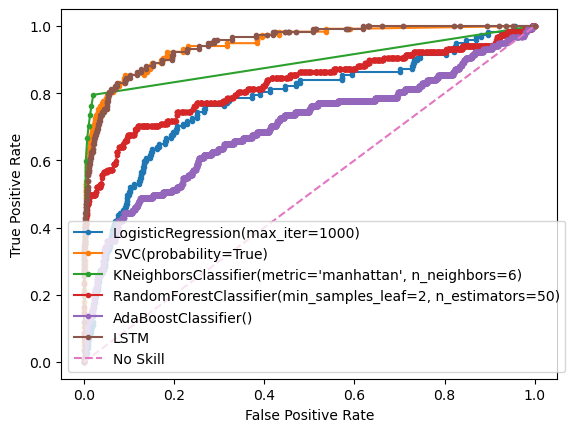

[[0.8301301606670735, 0.6495726495726496, 0.022511848341232227, 0.04351560263383911, 0.7403916646666377], [0.992475086434818, 0.5128205128205128, 0.3973509933774834, 0.44776119402985065, 0.7540830097221074], [0.9880008135041692, 0.7008547008547008, 0.28975265017667845, 0.41, 0.8452869484018786], [0.3055216595485052, 0.905982905982906, 0.007706848916678785, 0.01528368538677817, 0.6039555980479718], [0.006863941427699817, 1.0, 0.005954198473282443, 0.011837911670966763, 0.5004603345097438], [0.9900346, 0.50427353, 0.2994924, 0.86083776]]


In [529]:
results_blsmote = []
models = [lr, svm, knn, rf, ada]

for m in models:
    m.fit(X_train_blsmote, y_train_blsmote.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    prec = metrics.precision_score(y_test, predicted)
    f1 = metrics.f1_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted)
    results_blsmote.append([acc, rec, prec, f1, auc])
    m_probs = m.predict_proba(X_test)
    m_probs = m_probs[:, 1]
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    pyplot.plot(m_fpr, m_tpr, marker='.', label=(m))

X_numpy_blsmote = np.expand_dims(X_train_blsmote.values[:,:],axis = 2)
y_numpy_blsmote = y_train_blsmote.values[:]
X_numpy_blsmote_test = np.expand_dims(X_test_blsmote.values[:,:],axis = 2)
y_numpy_blsmote_test = y_test_blsmote.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X_numpy_smote, y_numpy_smote, epochs=15, batch_size=64, validation_data=(X_numpy_smote_test, y_numpy_smote_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()

ba = tf.keras.metrics.BinaryAccuracy()
ba.update_state(y_numpy, ypred)
acc = ba.result().numpy()

br = tf.keras.metrics.Recall()
br.update_state(y_numpy, ypred)
rec = br.result().numpy()

bp = tf.keras.metrics.Precision()
bp.update_state(y_numpy, ypred)
prec = bp.result().numpy()

# bf1 = tf.keras.metrics.F1Score()
# bf1.update_state(y_numpy, ypred)
# f1 = bf1.result().numpy()

bauc = tf.keras.metrics.AUC()
bauc.update_state(y_numpy, ypred)
auc = bauc.result().numpy()

results_blsmote.append([acc, rec, prec, auc])

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_numpy, ypred)
pyplot.plot(fpr_keras, tpr_keras, marker='.', label=("LSTM"))
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(results_blsmote)

In [414]:
final_results = [[results_no_sample], [results_under], [results_over], [results_smote], [results_adasyn], [results_blsmote]]

In [415]:
final_results

[[[[0.9934919666463291,
    0.015384615384615385,
    1.0,
    0.030303030303030307,
    0.5076923076923077],
   [0.993949562741509,
    0.08461538461538462,
    1.0,
    0.15602836879432627,
    0.5423076923076923],
   [0.9936953426886312,
    0.06153846153846154,
    0.8,
    0.1142857142857143,
    0.5307180484578377],
   [0.9974577994712223,
    0.6230769230769231,
    0.9878048780487805,
    0.7641509433962265,
    0.8115128703827649],
   [0.9964917632702868,
    0.5769230769230769,
    0.8426966292134831,
    0.6849315068493151,
    0.7881032622817862]]],
 [[[0.7524405125076266,
    0.7153846153846154,
    0.018883248730964468,
    0.03679525222551929,
    0.7340358433663787],
   [0.7939292251372788,
    0.7307692307692307,
    0.023097495745198152,
    0.0447796370492576,
    0.7625593517957118],
   [0.8674496644295302,
    0.5846153846153846,
    0.02890833016356029,
    0.055092424791591155,
    0.7269734718142948],
   [0.8683648566198902,
    0.9846153846153847,
    0.0471454

In [269]:
# sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
# mean0 = final_adasyn[final_adasyn['label'] == 0].sample(30)
# mean1 = final_adasyn[final_adasyn['label'] == 1].sample(30)
# fvalue, pvalue = stats.ttest_ind(mean0['text_distance'], mean1['text_distance'])
# print(fvalue, pvalue)

In [ ]:
# pca = PCA(n_components = 5)
# X_train_blsmote = pca.fit_transform(X_train_blsmote)
# X_test_blsmote = pca.transform(X_test_blsmote)
# explained_variance = pca.explained_variance_ratio_
# explained_variance